## Estadística Aplicada

Sesión 19 - 18 de octubre

Nombre: Susana Yareli Lino Reséndiz

Matricula: 1986245

Grupo: 41

In [1]:
#Importar las librerias basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Librerias especializadas
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
#Estimar modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [3]:
#Tamaño del grafico
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
#Datos
igae_sa = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/igae_deses.csv')
igae_sa.head(5)

,meses,IGAE_DESES
0,1993/01,56.282290
1,1993/02,57.708594
2,1993/03,57.825254
3,1993/04,57.179522
4,1993/05,57.895451


In [5]:
#Darle formato de fecha a meses
igae_sa['meses'] = pd.to_datetime(igae_sa['meses'], format = '%Y/%m')

In [6]:
#Hacerlo index
igae_sa = igae_sa.set_index('meses')

In [7]:
#Asignar frecuencia mensual
igae_sa = igae_sa.asfreq('MS')

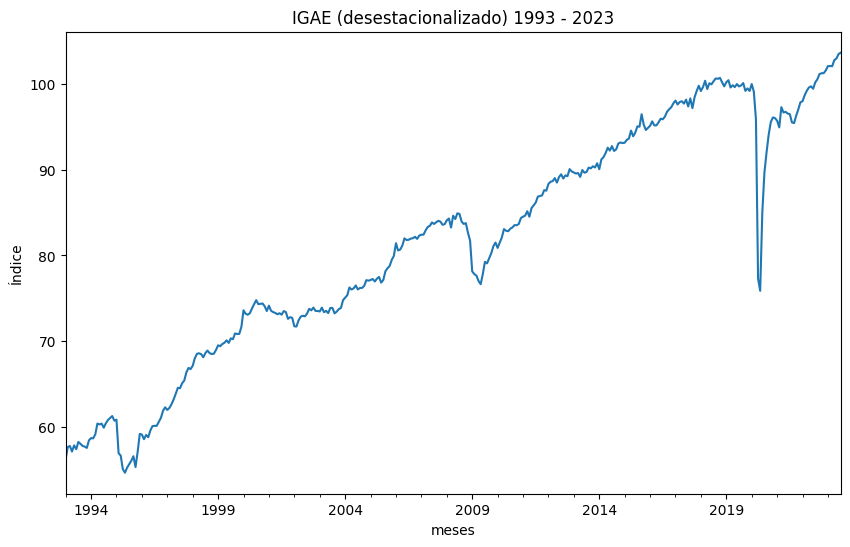

In [8]:
igae_sa['IGAE_DESES'].plot()
plt.title('IGAE (desestacionalizado) 1993 - 2023')
plt.ylabel('Índice');

In [9]:
#Prueba de Dickey-fuller aumentada
#Para saber si es estacionaria o no estacionaria
#H0 = No estacionaria
#Ha = Estacionaria
df_test = adfuller(igae_sa['IGAE_DESES'])
pvalue = df_test[1]

In [10]:
pvalue

0.7352896929912623

No rechazamos H0, por lo que significa que la serie es NO ESTACIONARIA

In [11]:
#Hacer la serie estacionaria
igae_sa['igae_diff'] = igae_sa['IGAE_DESES'].diff()
igae_sa.head(5)

,IGAE_DESES,igae_diff
meses,,
1993-01-01,56.282290,NaN
1993-02-01,57.708594,1.426305
1993-03-01,57.825254,0.116660
1993-04-01,57.179522,-0.645732
1993-05-01,57.895451,0.715929


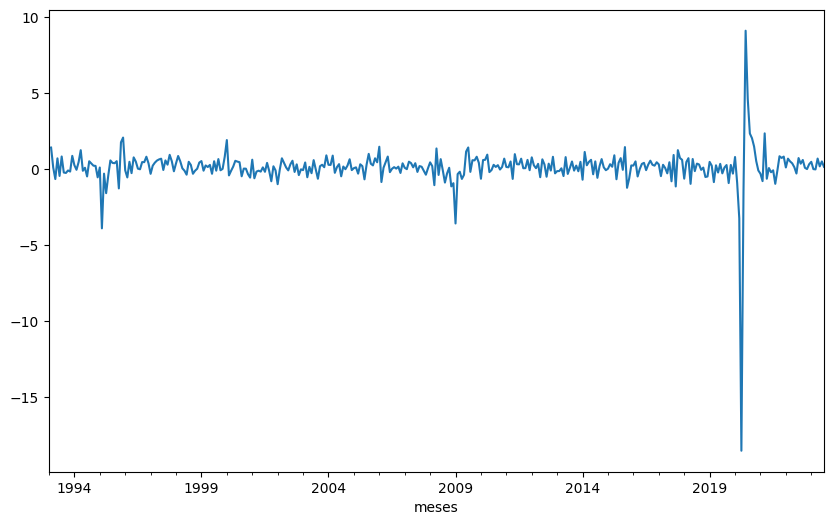

In [12]:
#Graficar la nueva serie
igae_sa['igae_diff'].plot();

In [13]:
#Corroborar su las primeras diferecnias son estacionarias
df_test1 = adfuller(igae_sa['igae_diff'].dropna())
#Como el primer valor es NAN le ponemos que lo ignore
pvalue1 = df_test1[1]
pvalue1.round(10)

0.0

Rechazamos H0, lo que significa que las primeras diferencias del igae son estacionarias.

IGAE - I(1)

Primeras diferencias - I(0)

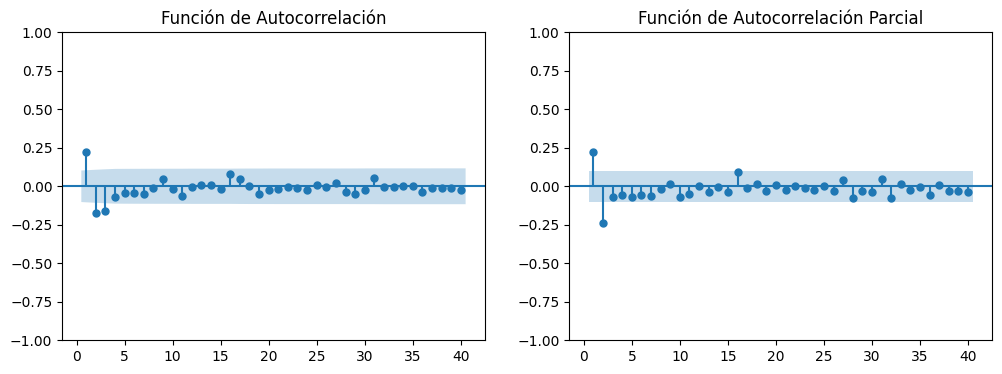

In [14]:
#Gráficas de autocorrelación y de autocorrelación parcial
ig, ax = plt.subplots (1, 2, figsize = (12, 4))
plot_acf(igae_sa['igae_diff'].dropna(), zero = False, lags = 40, ax = ax[0], title = 'Función de Autocorrelación')
ax[0].set_ylim(-1, 1)
plot_pacf(igae_sa['igae_diff'].dropna(), zero = False, lags = 40, ax = ax[1], title = 'Función de Autocorrelación Parcial')
ax[1].set_ylim(-1, 1)
plt.show()

In [15]:
#AR(1) -> (p, I(d), q)
modelo_prueba = ARIMA(igae_sa['igae_diff'].dropna(), order = (1, 0, 0))
resultadop = modelo_prueba.fit()
print(resultadop.summary())

                               SARIMAX Results                                
Dep. Variable:              igae_diff   No. Observations:                  366
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -602.265
Date:                Wed, 18 Oct 2023   AIC                           1210.530
Time:                        20:26:18   BIC                           1222.238
Sample:                    02-01-1993   HQIC                          1215.182
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1303      0.118      1.100      0.271      -0.102       0.363
ar.L1          0.2219      0.027      8.070      0.000       0.168       0.276
sigma2         1.5731      0.021     74.742      0.0

In [ ]:
# vamos a estimar varios modelos y que se guarde el AIC BIC
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(igae_sa['igae_diff'].dropna(), order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

In [17]:
ic.sort_values('AIC').head()

,,AIC,BIC
AR,MA,,
3,1,1183.372558,1206.788358
1,4,1184.843163,1212.161596
3,2,1184.880343,1212.198776
4,1,1185.021097,1212.339530
1,5,1186.229371,1217.450437


El resultado significa que primeras diferencias es una

ARIMA(3, 0, 1) = ARMA (3, 1), lo que significa que igae_deses ARIMA (3, 1, 1).

$$Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \phi_3 Y_{t-3} - \theta \varepsilon_{t-1} + \varepsilon_t$$

In [18]:
#Estimar el modelo
#igae ARIMA (3, 1, 1)
arima_model = ARIMA(igae_sa['IGAE_DESES'], order = (3, 1 ,1))
results = arima_model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             IGAE_DESES   No. Observations:                  367
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -591.604
Date:                Wed, 18 Oct 2023   AIC                           1193.208
Time:                        20:31:57   BIC                           1212.721
Sample:                    01-01-1993   HQIC                          1200.962
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0175      0.232      4.384      0.000       0.563       1.472
ar.L2         -0.4222      0.072     -5.876      0.000      -0.563      -0.281
ar.L3          0.1048      0.089      1.176      0.2

In [19]:
#Pronosticar el pasado
igae_sa['m_arima'] = results.predict()

In [20]:
igae_sa.head(5)

,IGAE_DESES,igae_diff,m_arima
meses,,,
1993-01-01,56.282290,NaN,0.000000
1993-02-01,57.708594,1.426305,56.282311
1993-03-01,57.825254,0.116660,58.035802
1993-04-01,57.179522,-0.645732,57.530971
1993-05-01,57.895451,0.715929,56.886611


In [21]:
igae_sa['m_arima'][0] = igae_sa['IGAE_DESES'][0]

In [22]:
igae_sa.head(5)

,IGAE_DESES,igae_diff,m_arima
meses,,,
1993-01-01,56.282290,NaN,56.282290
1993-02-01,57.708594,1.426305,56.282311
1993-03-01,57.825254,0.116660,58.035802
1993-04-01,57.179522,-0.645732,57.530971
1993-05-01,57.895451,0.715929,56.886611


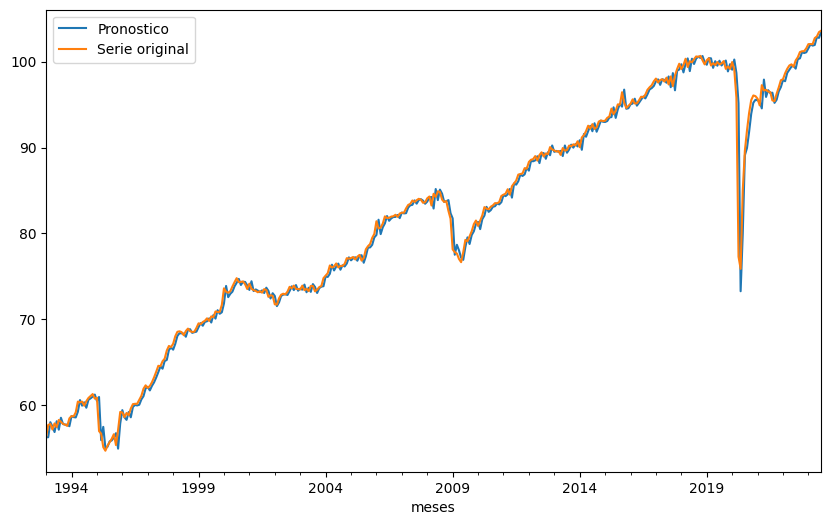

In [24]:
#Grafica
igae_sa['m_arima'].plot(label = 'Pronostico')
igae_sa['IGAE_DESES'].plot(label = 'Serie original')
plt.legend();

El modelo ARIMA estimado logra reproducir la evolución pasada de las series, el modelo puede ser útil para pronosticar.

In [25]:
igae_sa.tail(1)

,IGAE_DESES,igae_diff,m_arima
meses,,,
2023-07-01,103.596612,0.158524,103.442199


(612.0, 646.0)

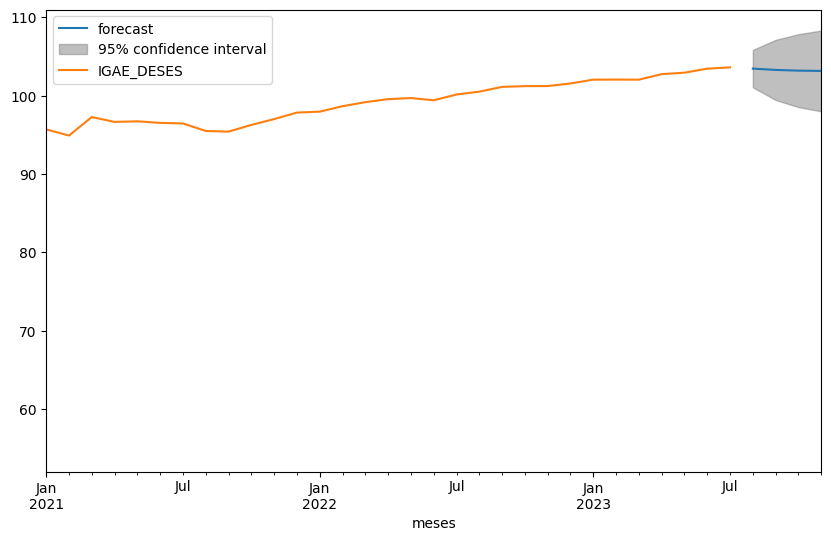

In [31]:
plot_predict(results, start = '2023-08-01', end = '2023-11-01')
igae_sa['IGAE_DESES'].plot()
plt.legend()
plt.xlim('2021-01-01', '2023-11-01')

In [33]:
results.predict(start = '2023-08-01', end = '2023-11-01' )

2023-08-01    103.443848
2023-09-01    103.275282
2023-10-01    103.184865
2023-11-01    103.148016
Freq: MS, Name: predicted_mean, dtype: float64

Los modelos ARIMA son modelos de pronostico a corto plazo, no pueden pronosticar muy a futuro y entre mas a futuro pedimos un pronostico el intervalo de confianza se vuelve mas grande.

En general, si es un ARIMA (3, 1, 1) se considera que el modelo pronostica con bastante precision 3 periodos, si es un ARIMA (2, 1, 3) pronostica 3 periodos, ARIMA (2, 1, 4) 4 periodos.